In [ ]:
Observations:
    
Based on the data, the Capomurin treatment reduced the size of the tumor over a 45 day period. 
Though I would like to see if this trend continues. It also seems that the Ramicane treatment has been effective as well, 
especially in comparison to the Capomurin treatemnt.

It needs to investigated whether the gender of the mice play a factor in whether or not the drug is effective 
because if so it is very significant and will affect the study.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
num_mice = len(combined_data['Mouse ID'].unique())
num_mice

249

In [3]:
combined_data['Mouse ID'].value_counts()
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
duplicate = combined_data.loc[(combined_data['Mouse ID'] == 'g989')] 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [61]:
clean_df = combined_data[(combined_data['Mouse ID'] != 'g989')]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
num_mice_clean_df = len(clean_df['Mouse ID'].value_counts())
num_mice_clean_df

248

In [7]:
regimens_df = clean_df.groupby("Drug Regimen")

mean_tumor = round(regimens_df['Tumor Volume (mm3)'].mean(), 6)

median_tumor = round(regimens_df['Tumor Volume (mm3)'].median(), 6)

std_tumor = round(regimens_df['Tumor Volume (mm3)'].std(), 6)

var_tumor = round(regimens_df['Tumor Volume (mm3)'].var(),6)

sem_tumor = round(regimens_df['Tumor Volume (mm3)'].sem(ddof=0), 6)



summary_stats = {"Mean": mean_tumor,
                "Median": median_tumor,
                "Variance": var_tumor,
                "Std Deviation": std_tumor,
                "SEM": sem_tumor}

summ_stats_df = pd.DataFrame(summary_stats)
summ_stats_df.columns=pd.MultiIndex.from_product([['Tumor Volume Summary Stats'],summ_stats_df.columns])
summ_stats_df

Tumor Volume Summary Stats                                      \
                                   Mean     Median   Variance Std Deviation   
Drug Regimen                                                                  
Capomulin                     40.675741  41.557809  24.947764      4.994774   
Ceftamin                      52.591172  51.776157  39.290177      6.268188   
Infubinol                     52.884795  51.820584  43.128684      6.567243   
Ketapril                      55.235638  53.698743  68.553577      8.279709   
Naftisol                      54.331565  52.509285  66.173479      8.134708   
Placebo                       54.033581  52.288934  61.168083      7.821003   
Propriva                      52.320930  50.446266  43.852013      6.622085   
Ramicane                      40.216745  40.673236  23.486704      4.846308   
Stelasyn                      54.233149  52.431737  59.450562      7.710419   
Zoniferol                     53.236507  51.818479  48.533355      6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.328629  
Ceftamin      0.468499  
Infubinol     0.490851  
Ketapril      0.602252  
Naftisol      0.594860  
Placebo       0.579722  
Propriva      0.542490  
Ramicane      0.320250  
Stelasyn      0.571526  
Zoniferol     0.514977

In [8]:
summary_stats_df2 = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", 
                                               "median", 
                                               "var", 
                                               "std", 
                                               "sem"])
summary_stats_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# %matplotlib notebook

In [9]:
mice_tested = pd.DataFrame(regimens_df['Drug Regimen'].count())
mice_tested

,Drug Regimen
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


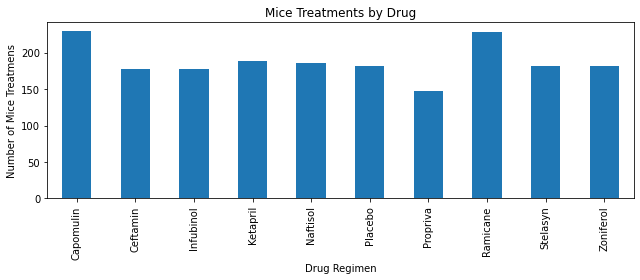

In [10]:
mice_tested.plot(kind="bar", figsize=(9,4), legend=False)

plt.title("Mice Treatments by Drug")
plt.ylabel("Number of Mice Treatmens")
plt.tight_layout() 

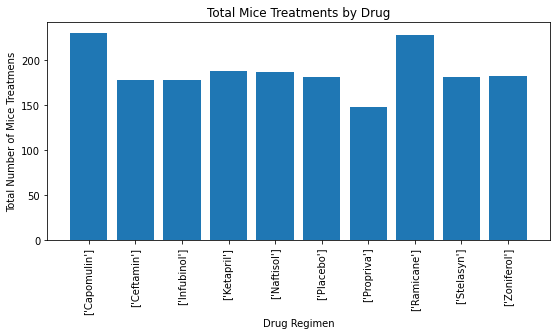

<Figure size 432x288 with 0 Axes>

In [11]:
x_axis = np.arange(len(regimens_df))
tick_locations = [value for value in x_axis]
tick_labels = regimens_df["Drug Regimen"].unique()
plt.figure(figsize=(9,4))
plt.bar(x_axis, regimens_df['Drug Regimen'].count())
plt.xticks(tick_locations, tick_labels, rotation="vertical")

# Set titles for the chart
plt.title("Total Mice Treatments by Drug")
plt.ylabel("Total Number of Mice Treatmens")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

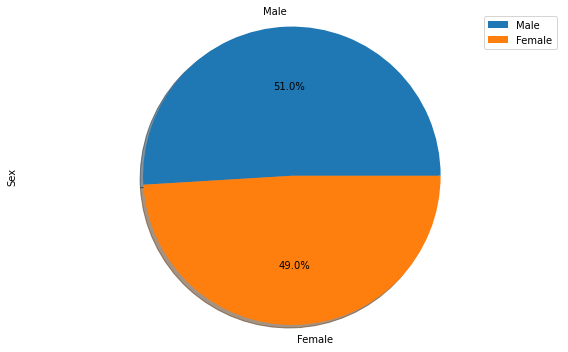

In [13]:
sex_of_mice = pd.DataFrame(clean_df['Sex'].value_counts())

sex_of_mice.plot.pie(y='Sex', figsize=(8, 5), shadow=True, autopct='%1.1f%%')


plt.axis("equal")
plt.tight_layout()
plt.show()

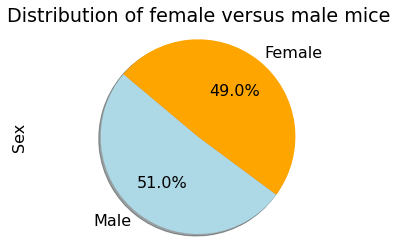

In [18]:
mice_gender = list(sex_of_mice.index.values)

gender_counts = sex_of_mice['Sex']

colors = ["lightblue", "orange"]


plt.pie(gender_counts, labels=mice_gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

In [19]:
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


four_drugs = combined_data[combined_data['Drug Regimen'].isin(drug_list)]


four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
four_regimen = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
      
        Last_tumor=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(6)


four_regimen

Last_tumor
Drug Regimen Mouse ID            
Capomulin    b128       38.982878
             b742       38.939633
             f966       30.485985
             g288       37.074024
             g316       40.159220
...                           ...
Ramicane     s508       30.276232
             u196       40.667713
             w678       43.166373
             y449       44.183451
             z578       30.638696

[100 rows x 1 columns]

In [21]:
four_regimen_unstack = four_regimen.stack(level=0).unstack(level=0)

four_regimen_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor,NaN,NaN,67.973419,NaN
a251,Last_tumor,NaN,NaN,65.525743,NaN
a275,Last_tumor,NaN,62.999356,NaN,NaN
a411,Last_tumor,NaN,NaN,NaN,38.407618
a444,Last_tumor,NaN,NaN,NaN,43.047543


In [22]:
counter = 0


for drug in drug_list:
    quartiles = four_regimen_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
   
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.


In [24]:
boxplot_list = []


for drug in drug_list:
    boxplot_list.append(list(four_regimen_unstack[drug].dropna()))

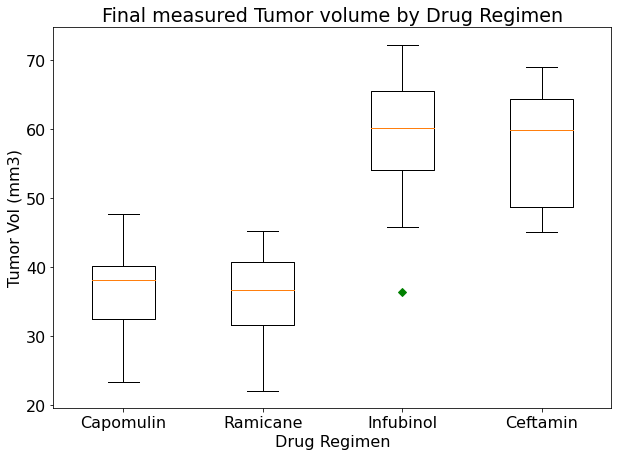

In [25]:
fig1, ax = plt.subplots(figsize=(10,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)


plt.show()

In [66]:
capomulin = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']


capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [67]:
capomulin_time = capomulin.groupby(['Timepoint']).agg(\
        
        Vol_Mean=('Tumor Volume (mm3)', np.mean),\
       
        Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)


capomulin_time.head()

,Vol_Mean,Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910


In [69]:
capomulin2 = combined_data.loc[combined_data['Mouse ID'] == 'b742']

capomulin2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


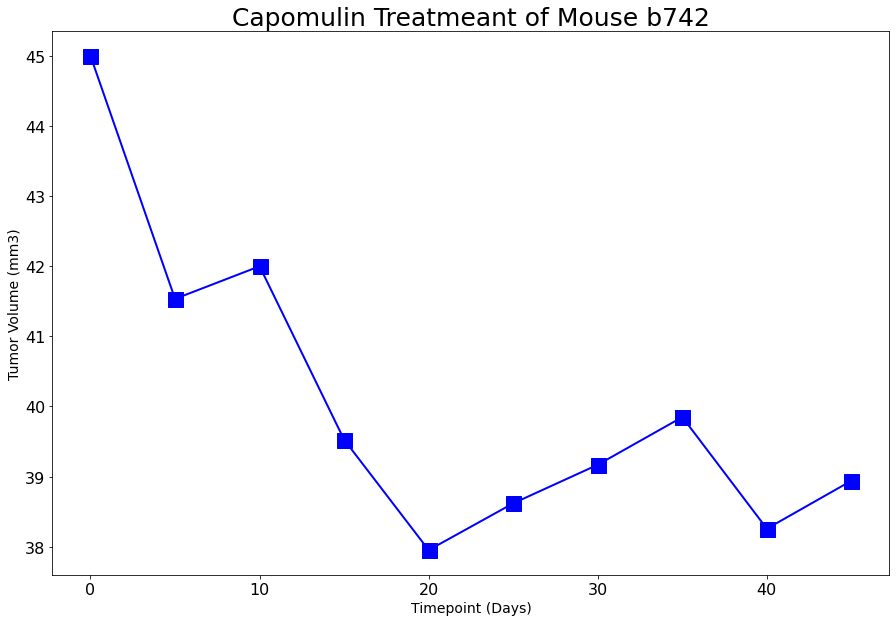

In [70]:
x_axis = capomulin2["Timepoint"]
tumsiz = capomulin2["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin Treatmeant of Mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="s",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)



plt.show()

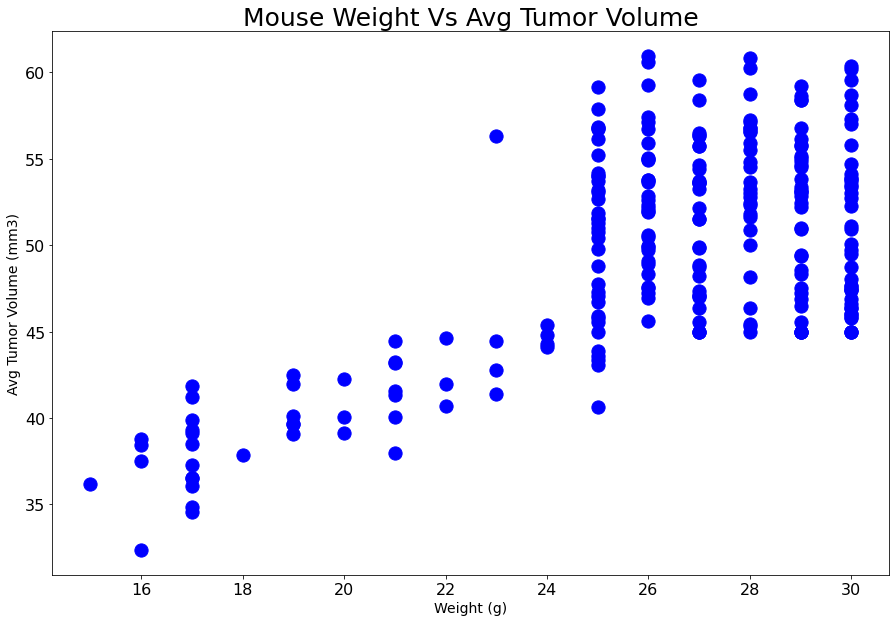

In [73]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =combined_data.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Vs Avg Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Avg Tumor Volume (mm3)',fontsize =14)




plt.show()